### Анализ гипотез и результатов А/В теста для увеличения выручки интернет-магазина

**Цель:**

Приоритизировать 9 гипотез и выбрать самые перспективные. Выполнить анализ результатов А/В теста, чтобы принять дальнешее решение для увеличения выручки интернет-магазина, а именно: построить графики выручки, среднего чека и конверсии по группам, чтобы визуально ознакомиться с различиями между ними; рассчитать статистическую значимость различий в среднем количестве заказов и среднем чеке между группами по "сырым" и "очищенным" данным. По результатам расчетов, принять решение, какая группа упешнее А/В теста и стоит ли его продолжать.

**Задачи:**
 - Применить фрейворк ICE & RICE для приоритизации гипотез.
 - Построить графики: кумулятивной выручки по группам, кумулятивного среднего чека по группам, относительного изменения кумулятивного среднего чека группы B к группе A,  среднего количества заказов на посетителя по группам, относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A,  количества заказов по пользователям, стоимостей заказов. Сделать по ним выводы и предположения.
 - Выполнить расчет: 95-й и 99-й перцентили количества заказов на пользователя и стоимости заказов, статистической значимости различий в среднем количестве заказов на посетителя, а также различий в среднем чеке заказа между группами по «сырым» данным, статистической значимости различий в среднем количестве заказов на посетителя, а также различий в среднем чеке заказа между группами по «очищенным» данным.
 - Принять решение по результатам теста.
 
**Шаги анализа:**
 
 Все данные для анализа мы возьмем из предоставленных трёх датасетов:
  1. Данные о гипотезах `/datasets/hypothesis.csv`
  2. Данные о заказах `/datasets/orders.csv`
  3. Данные о пользователях и их группе А/В теста `/datasets/visitors.csv`
  
Для начала, нам необходимо изучить все фреймы: выявить явные и неявные дубликаты, пропуски, типы данных и выполнить предобработку для дальнейшего корректного анализа. 

Применить фреймворк ICE & RICE для приоритизации гипотез.

Проанализировать А/В тест, согласно поставленным задачам.

Сделать выводы и предположения, принять решение касательно результатов А/В теста.

Данный анализ будет выполнен в 4 этапа:
  1. Изучение и предобработка данных
  2. Приоритизация гипотез
  3. Анализ A/B-теста
  4. Выводы и рекомендации 

### Шаг №1: Изучение и предобработка данных

In [1]:
#импортируем необходимые библиотеки

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy.stats as stats
import datetime as dt

In [2]:
#загрузим датафреймы и сохраним их в переменные

hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

#зададим расширение для экрана, чтобы вывести все записи
pd.options.display.max_colwidth = 500

In [3]:
#создадим функцию для ознакомления с датафреймом

def pre_processing(data):
    
    #выведем первые пять строк фрейма
    head_info = display(data)
    print('*'*50)
    
    #выведем общую информацию о фрейме
    inform = data.info()
    print('*'*50)
    
    #проверим наличие явных дубликатов
    dub_count = data.duplicated().sum()

In [4]:
#изучим визуально фреймы вызвав функцию pre_processing

pre_processing(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
**************************************************


С датасетом "Гипотезы" всё в порядке, нет пропусков и дубликатов, все данные имеют корректный тип. Приведём только наименование столбцов к нижнему регистру, для удобства.

In [5]:
hypothesis.columns = map(str.lower, hypothesis.columns)

In [6]:
pre_processing(orders)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
**************************************************


В датасете "Заказы" нет пропусков и дубликатов, но столбец **date** нужно привести к типу данных `datetime`.

In [7]:
#проверим уникальные значения в столбце 'group', их должно быть всего два: А и В

orders['group'].unique()

array(['B', 'A'], dtype=object)

In [8]:
pre_processing(visitors)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
**************************************************


Здесь также нужно привести столбец **date** к типу `datetime`.

In [9]:
#проверим уникальные значения в столбце 'group', их должно быть всего два: А и В

visitors['group'].unique()

array(['A', 'B'], dtype=object)

In [10]:
#приведём даты к необходимому типу данных с помощью lambda-функции

orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [11]:
#выведем даты начала и окончания А/В теста из таблицы с заказами
print('Начало А/В теста:', orders['date'].min())
print('Окончание А/В теста:', orders['date'].max())
print()

#выведем даты начала и окончания А/В теста из таблицы с пользователями
print('Начало А/В теста:', visitors['date'].min())
print('Окончание А/В теста:', visitors['date'].max())

Начало А/В теста: 2019-08-01 00:00:00
Окончание А/В теста: 2019-08-31 00:00:00

Начало А/В теста: 2019-08-01 00:00:00
Окончание А/В теста: 2019-08-31 00:00:00


Мы определили дату начала теста 2019-08-01 и дату окончания теста 2019-08-31. Даты совпадают в обеих таблицах, можем сделать вывод, что тест длился ровно месяц.

In [12]:
#посчитаем сколько пользователей попало в группы А/В теста, чтобы убедится в их равномерном расспределении
print('В группе А количество пользователей:', orders.query('group == "A"')['visitorId'].count())
print('В группе B количество пользователей:', orders.query('group == "B"')['visitorId'].count())

В группе А количество пользователей: 557
В группе B количество пользователей: 640


Мы видим, что в группе В находится на 83 пользователя больше (7% от общего количества).

In [13]:
#проверим какое количество пользователей попало в обе группы

double_group = (orders
                .groupby('visitorId')
                .agg({'group':'nunique'})
                .reset_index())
print('Количество пользователей в двух группах:', double_group.query('group > 1')['visitorId'].count())

Количество пользователей в двух группах: 58


В обе группы попали 58 пользователей, чтобы не исказить данные мы их удалять не будем.

### Шаг №2: Приоритизация гипотез

#### Метод ICE

In [14]:
#рассчитываем ICE и добавляем его в датасет

hypothesis['ICE'] = ((hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']).round(2)

#выведем датасет по убыванию значимости ICE

hypothesis.sort_values(by='ICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


Наиболее перспективные гипотезы по методу ICE: 
 - 8_Запустить акцию, дающую скидку на товар в день рождения
 - 0_Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
 - 7_Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

#### Метод RICE

In [15]:
#рассчитываем RICE и добавляем его в датасет

hypothesis['RICE'] = ((hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']).round(2)

#выведем датасет по убыванию значимости RICE

hypothesis.sort_values(by='RICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


Наиболее перспективные гипотезы по методу RICE: 
 - 7_Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
 - 2_Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
 - 0_Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

_**Промежуточный вывод:** Мы видим, что по результатам приоритезации гипотез, самыми перспективными являются гипотезы **по методу ICE**:_
 - 8_Запустить акцию, дающую скидку на товар в день рождения
 - 0_Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
 - 7_Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

_**по методу RICE**:_
 - 7_Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
 - 2_Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
 - 0_Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

**_Мы можем выделить общие из них гипотезы это:_**
 - 7_Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
 - 0_Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

_и проверять их в первую очередь. Такая разница произошла из-за того, что в методе ICE не учивается охват аудитории `reach`, который имеет самый высокий показатель для седьмой гипотезы. Если мы хотим увеличить выручку компании, то нам необходимо учитывать данный показатель._

### Шаг №3: Анализ A/B-теста

#### График кумулятивной выручки по группам

Чтобы построить графики, нужно собрать кумулятивные данные. Создадим датафрейм, который будет содержать следующие столбцы: 
 - `date` дата;
 - `group` группа А/В теста;
 - `orders` кумулятивное количество заказов на указанную дату в указанной группе;
 - `buyers` кумулятивное количество пользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе;
 - `revenue` кумулятивная выручка на указанную дату в указанной группе (средний чек);
 - `visitors` кумулятивное количество посетителей интернет-магазина на указанную дату в определённой группе.

In [16]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5)) 

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


In [17]:
#проверим совпадают ли даты начала и окончания теста
print('Начало А/В теста:', cumulativeData['date'].min())
print('Окончание А/В теста:', cumulativeData['date'].max())

Начало А/В теста: 2019-08-01 00:00:00
Окончание А/В теста: 2019-08-31 00:00:00


Даты совпадают, значит в датафрейм cumulativeData попали все данные для дальнейшего анализа.

Теперь можно приступить к построению графика кумулятивной выручки по дням и группам A/B-тестирования.

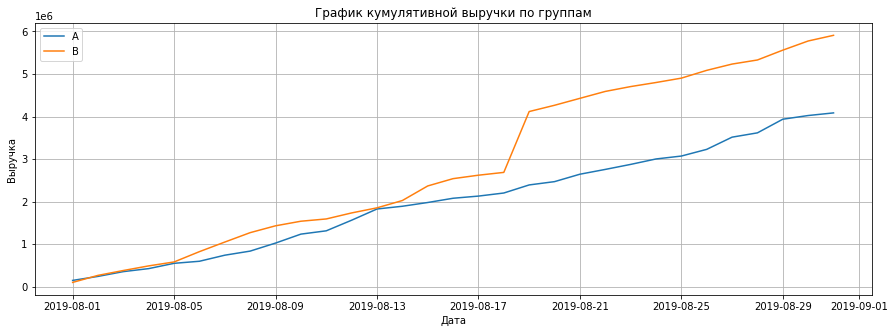

In [18]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# зададим размер графика
plt.figure(figsize=(15, 5))

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

#задаём подписи, сетку и выводим график
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.legend()
plt.grid()
plt.show() 

Выручка для обеих групп увеличивается на протяжении всего теста, это очень хороший показатель. Но для группы В мы видим крайне сильный скачёк в выручке после 17.08.2019, это может означать либо о большом количестве заказов, либо о наличии в выборке дорогих заказов.

#### График кумулятивного среднего чека по группам

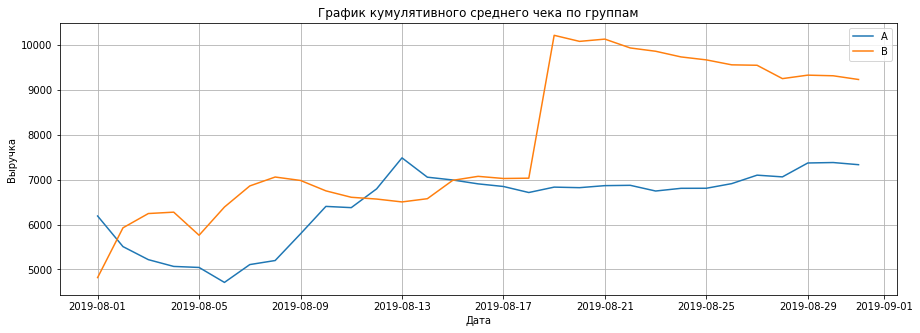

In [19]:
# зададим размер графика
plt.figure(figsize=(15, 5))

#разделим кумулятивную выручку на кумулятивное число заказов
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

#задаём подписи, сетку и выводим график
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.legend()
plt.grid()
plt.show()

Из графика видим, что средний чек становится равномерным для обеих групп к концу теста (после 25.08.2019). Очень сильный скачек для группы В, может свидетельствовать о наличии аномалий (выбросов) в данных, а именно крупные заказы, которые могут искажать данные. Более точный вывод мы сможем сделать к концу нашего анализа.

#### График относительного изменения кумулятивного среднего чека группы B к группе A

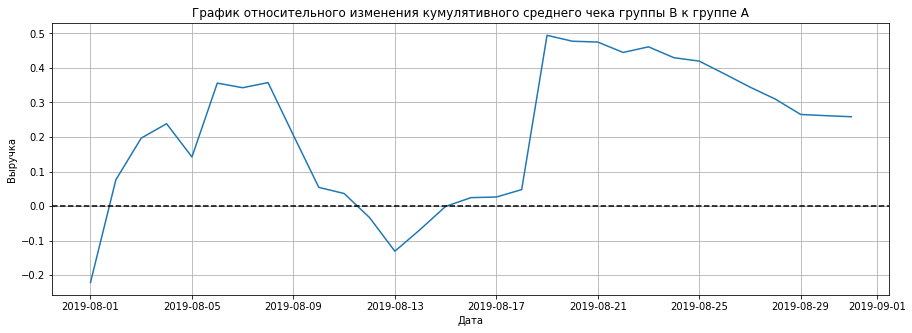

In [20]:
# зададим размер графика
plt.figure(figsize=(15, 5))

# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 

#задаём подписи, сетку и выводим график
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.grid()
plt.show()

Огромные скачки между группами в нескольких точках подтверждают наличие больших заказов (выбросов).

#### График кумулятивного среднего количества заказов на посетителя по группам

Соотношение среднего количества заказов на посетителя по группам - это кумулятивная конверсия. Чтобы построить график, мы зададим масштаб осей методом plt.axis(). Передадим ему минимальное и максимальное значения оси x; минимальное и максимальное значения оси y — (2019-08-01; 2019-08-31)

In [21]:
print(mergedCumulativeRevenue['date'].min())
print(mergedCumulativeRevenue['date'].max())

2019-08-01 00:00:00
2019-08-31 00:00:00


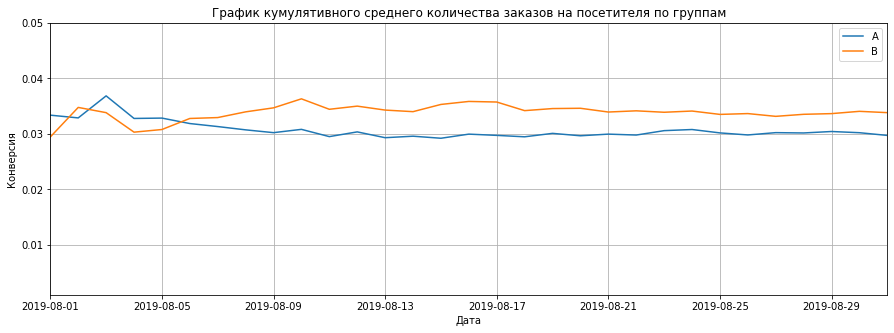

In [22]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# зададим размер графика
plt.figure(figsize=(15, 5))

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0.001, 0.05])

#задаём подписи, сетку и выводим график
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.grid()
plt.show()

До 05.08.2019 конверсия группы А и В изменялась практически одинаково, при этом конверсия группы А была больше чем у группы В, но после 05.08.2019 конверсия группы В начала увеличиваться и зафиксировалась около значения (0.033-0.034), тогда как для группы А, конверсия начала резко падать практически с начала теста (02.08.2019) и зафиксировалась после 13.08.2019 около значения 0.03.

#### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

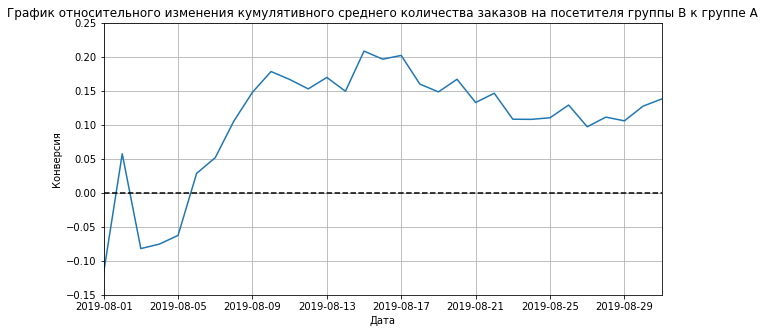

In [23]:
#объединим таблицы конверсии для группы А и В для дальнейшего построения графика соотношения заказов группы В к группе А
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# зададим размер графика
plt.figure(figsize=(10, 5))

#строим график изменения относительного различия кумулятивных конверсий
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)

#добавим горизонтальную ось
plt.axhline(y=0, color='black', linestyle='--')

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), -0.15, 0.25])

#задаём подписи, сетку и выводим график
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.grid()
plt.show()

В самом начале теста конверсия группы В сразу вырвалась вперёд и тут же резко упала, но после 05.08.2019 снова начала расти и резко обогнала конверсию группы А, достигнув значения 0.2 начала уменьшаться и зафиксировалась около значения 0.13-0.14.

**Все графики говорят нам о том, что в данных есть выбросы, которые следует проанализировать, так как они могут сильно повлиять на принятие решений после анализа результатов А/В теста.**

#### Точечный график количества заказов по пользователям

In [24]:
#для построения графика создадим переменную и сгруппируем количество заказов по пользователям

ordersByUsers = (orders
                 .groupby('visitorId', as_index=False)
                 .agg({'transactionId': 'nunique'}))

ordersByUsers.columns = ['visitorId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10)) 

       visitorId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


Из полученных данных явно выделяются пользователи, которые сделали более 5 заказов за месяц. Чтобы лучше увидетть выбросы построим точечную диаграмму.

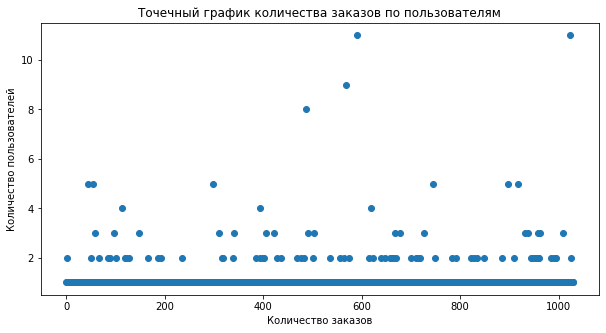

In [25]:
#проранжируем данные в таблице ordersByUsers
x_values = pd.Series(range(0,len(ordersByUsers)))

# зададим размер графика
plt.figure(figsize=(10, 5))

#строим точечный график
plt.scatter(x_values, ordersByUsers['orders']) 

#задаем подписи
plt.title('Точечный график количества заказов по пользователям')
plt.xlabel('Количество заказов')
plt.ylabel('Количество пользователей')
plt.show()

Из графика видно, что большая часть пользователей делает заказ от 1-2 в месяц. Но чтобы лучше понять какие данные составляют выбросы необходимо посчитать выборочные перцентили количества заказов на одного пользователя.

#### Расчёт 95-го и 99-го перцентиля количества заказов на пользователя

In [26]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[2. 4.]


Не более 5% пользователей оформляли больше чем 2 заказа, и только 1% оформляли более 4 заказов в месяц. По этому выбираем 2 заказа на пользователя как верхнюю границу числа заказов, всё что более двух заказов можно отсеять. Удалим их после построения всех необходимых графиков.

#### Точечный график стоимостей заказов

In [27]:
#отсортируем чек по убыванию
orders.sort_values(by = 'revenue', ascending=False)

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
858,192721366,1316129916,2019-08-27,93940,A
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
...,...,...,...,...,...
933,3760662696,3577713868,2019-08-27,60,B
459,863448794,2738601405,2019-08-19,50,B
756,125335873,3423937755,2019-08-30,50,B
584,1126146019,2705308997,2019-08-20,50,A


Из таблицы видно, что в данных присутствуют аномалии, такие как чек на сумму 1 294 500 у.е., в то время как есть множество заказов менее 100 у.е. Визуализируем данные с помощью точечной таблицы.

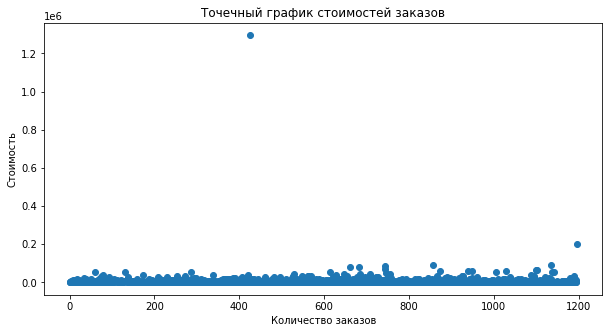

In [28]:
#проранжируем данные в датасете orders
x_values = pd.Series(range(0,len(orders['revenue'])))

# зададим размер графика
plt.figure(figsize=(10, 5))

#построим график
plt.scatter(x_values, orders['revenue']) 

#задаем подписи
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Количество заказов')
plt.ylabel('Стоимость')
plt.show()

По графику сложно понять, какие данные составляют аномалии, так как на его вид повлиял выброс в виде более 1.2 млн. у.е. Для точного определения аномалий нам необходимо посчитать перцентили стоимости заказов.

#### Расчёт 95-го и 99-го перцентиля стоимости заказов

In [29]:
print(np.percentile(orders['revenue'], [95, 99])) 

[28000.  58233.2]


Не более 5% заказов дороже 28 000 у.е. и не более 1% заказов дороже 58 233 у.е. Так как по количеству заказов мы будем отсеивать 5% данных, здесь мы можем отсеить 1% аномалий, заказы, которые дороже 58 000 у.е.

#### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Из построенных графиков мы увидели, что в данных присутствуют выбросы. Сначало сделаем расчёт статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным. 

Для этого выдвенем гипотезы. **Нулевая:** различий в среднем количестве заказов между группами нет. **Альтернативная**: различия в среднем количестве заказов между группами есть.

Для расчёта статистической значимости нам необходимо подготовить таблицу, которая будет содержать следующие данные:
 - `date` — дата;
 - `ordersPerDateA` — количество заказов в выбранную дату в группе A;
 - `revenuePerDateA` — суммарная выручка в выбранную дату в группе A;
 - `ordersPerDateB` — количество заказов в выбранную дату в группе B;
 - `revenuePerDateB` — суммарная выручка в выбранную дату в группе B;
 - `ordersCummulativeA` — суммарное число заказов до выбранной даты включительно в группе A;
 - `revenueCummulativeA` — суммарная выручка до выбранной даты включительно в группе A;
 - `ordersCummulativeB` — суммарное количество заказов до выбранной даты включительно в группе B;
 - `revenueCummulativeB` — суммарная выручка до выбранной даты включительно в группе B;
 - `visitorsPerDateA` — количество пользователей в выбранную дату в группе A;
 - `visitorsPerDateB` — количество пользователей в выбранную дату в группе B;
 - `visitorsCummulativeA` — количество пользователей до выбранной даты включительно в группе A;
 - `visitorsCummulativeB` — количество пользователей до выбранной даты включительно в группе B.

In [30]:
#считаем количество пользователей в выбранную дату в группе А
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]

#переименуем столбцы
visitorsADaily.columns = ['date', 'visitorsPerDateA']

#считаем количество пользователей до выбранной даты включительно в группе A
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}), axis=1)

#переименуем столбцы
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

#считаем количество пользователей в выбранную дату в группе В
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]

#переименуем столбцы
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

#считаем количество пользователей до выбранной даты включительно в группе В
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}), axis=1)

#переименуем столбцы
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

#сгруппируем данные по дате и посчитаем сумму заказов для уникальных заказов в группе А
ordersADaily = (orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
                .groupby('date', as_index=False)
                .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'}))

#переименуем столбцы
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

#сделаем расчёт кумулятивной суммы заказа и его количества для группы А, до выбранной даты включительно
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ), axis=1).sort_values(by=['date'])

#переименуем столбцы
ordersACummulative.columns = ['date', 'ordersCummulativeA','revenueCummulativeA']

#сгруппируем данные по дате и посчитаем сумму заказов для уникальных заказов в группе В
ordersBDaily = (orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
                .groupby('date', as_index=False)
                .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'}))

#переименуем столбцы
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

#сделаем расчёт кумулятивной суммы заказа и его количества для группы В, до выбранной даты включительно
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ), axis=1).sort_values(by=['date'])

#переименуем столбцы
ordersBCummulative.columns = ['date','ordersCummulativeB','revenueCummulativeB']

#объединим все полученные таблицы в одну и передадим её переменной data
data = (ordersADaily
        .merge(ordersBDaily, left_on='date', right_on='date', how='left')
        .merge(ordersACummulative, left_on='date', right_on='date', how='left')
        .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
        .merge(visitorsADaily, left_on='date', right_on='date', how='left')
        .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
        .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
        .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

#выведем первые пять строк
print(data.head()) 

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61               38

In [31]:
#создадим переменную ordersByUsersA для группы А, в которой пользователи делали заказ хотя бы один раз
ordersByUsersA = (orders[orders['group'] == 'A']
                  .groupby('visitorId', as_index=False)
                  .agg({'transactionId': pd.Series.nunique}))

#переименуем столбцы
ordersByUsersA.columns = ['visitorId', 'orders']

#создадим переменную ordersByUsersВ для группы В, в которой пользователи делали заказ хотя бы один раз
ordersByUsersB = (orders[orders['group'] == 'B']
                  .groupby('visitorId', as_index=False)
                  .agg({'transactionId': pd.Series.nunique}))

#переименуем столбцы
ordersByUsersB.columns = ['visitorId', 'orders']

#создаём переменные sampleA и sampleВ, в которых пользователям из разных групп будет
#соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. 
#Используем метод contact(), который объеденяет список с количеством заказов для каждого из пользователей и 
#нули для пользователей, которые ничего не заказывали

sampleA = pd.concat([ordersByUsersA['orders'], pd.Series(0, index=np.arange(
    data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],
    axis=0)

sampleB = pd.concat([ordersByUsersB['orders'], pd.Series(0, index=np.arange(
    data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],
    axis=0)

#считаем p-value с помощью метода Манна-Уитни, округляем значение до трёх цыфр после запятой
print('P-value равно:', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

#выводим относительный прирост среднего чека группы B, округлив до трёх знаков после запятой
print('Прирост среднего чека группы B к группе А равно:',"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

P-value равно: 0.017
Прирост среднего чека группы B к группе А равно: 0.138


_P-value_ менее 0.05, по этому у нас есть причины отвергать нулевую гипотезу и принять альтернативную, о том, что различия в среднем количестве заказов между группами есть.

Средний чек группы В опережает группу А на 13.8%.

#### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Выдвенем гипотезы. **Нулевая гипотеза:** различий в среднем чеке между группами нет. **Альтернативная гипотеза:** различия в среднем чеке между группами есть. 

In [32]:
#рассчитываем статистическую значимость различий в среднем чеке с помощью критерия mannwhitneyu() 
print('P-value равно:',
      '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))

#рассчитываем относительные различия в среднем чеке между группами
print('Различие в среднем чеке составляет:',
      '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

P-value равно: 0.729
Различие в среднем чеке составляет: 0.259


_p-value_ более 0.05, по этому нулевую гипотезу не отвергаем и есть основания считать, что различий в среднем чеке между группами нет, однако средний чек группы В больше чем у группы А.

#### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Примем за аномальных пользователей тех, кто совершил от 3 заказов или совершил заказ дороже 38 000 у.е. Сделаем срезы пользователей с числом заказов больше 2 — `usersWithManyOrders` и пользователей, совершивших заказы дороже 38 000 — `usersWithExpensiveOrders`. Объединим их в таблице `abnormalUsers`. 

In [33]:
#делаем срез данных по количеству заказов
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'],
                                 ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId']],
                                axis=0)

#делаем срез данных по сумме заказов
usersWithExpensiveOrders = orders[orders['revenue'] > 38000]['visitorId']

#объединяем срезы в одну таблицу
abnormalUsers = (pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
                 .drop_duplicates()
                 .sort_values())

#выведем первые пять строк таблицы
print(abnormalUsers.head())

print()
#выведем количество аномальных атрибутов
print('Количество аномальных атрибутов равно:', abnormalUsers.shape[0]) 

1099    148427295
18      199603092
23      237748145
37      249864742
684     358944393
Name: visitorId, dtype: int64

Количество аномальных атрибутов равно: 48


48 аномальных пользователей, которые следует удалить и посмотреть как изменились значения статистической значимости.

In [34]:
#подготовим выборки количества заказов по пользователям по группам теста по очищенным данным
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),
                                       name='orders')], axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),
                                       name='orders')], axis=0) 

In [35]:
#применим статистический критерий Манна-Уитни к полученным выборкам
print('P-value равно:',
      '{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

#выведем относительный прирост среднего чека группы B к группе А
print('Прирост среднего чека группы В к группе А составляет:',
      '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

P-value равно: 0.008
Прирост среднего чека группы В к группе А составляет: 0.184


_p-value_ уменьшилось в два раза, при этом нулевая гипотеза по прежнему отвергается и принимается альтернативная - различия в среднем количестве заказов между группами есть. Однако прирост среднего чека группы В к группе А вырос на 5%.

#### Статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [36]:
print('P-value равно:', '{0:.3f}'.format(stats.mannwhitneyu(
    orders[np.logical_and(orders['group'] == 'A',
                          np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(orders['group'] == 'B',
                          np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print('Прирост среднего чека группы В к группе А составляет:', '{0:.3f}'.format(orders[np.logical_and(
    orders['group'] == 'B',
    np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()
                       / orders[np.logical_and(orders['group'] == 'A',
                                               np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()- 1)) 

P-value равно: 0.994
Прирост среднего чека группы В к группе А составляет: 0.048


_p-value_ вырос и по прежнему более 0.05, по этому нулевую гипотезу не отвергаем и есть основания считать, что различий в среднем чеке между группами нет, однако средний чек группы В уменьшился на 21 %, но по прежнему больше чем у группы А.

### Шаг №4: Выводы и рекомендации

1. Мы ознакомились с данными, которые были представлены в трёх датасетах. Выявили, что в них нет пропусков и дубликатов, однако привели даты к необходимому типу данных `datetime`
2. Провели приоритезацию гипотез с помощью методов ICE & RICE и сделали вывод, что наиболее перспективными гипотезами по двум методам являются гипотезы под порядковым номером 7 и 0. Их необходимо проверить в первую очередь:

In [37]:
hypothesis.iloc[[7,0]]

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0


3. Построили кумулятивные графики и выявили, что в данных есть выбросы в виде дорогих заказов (более 38 000 у.е.) и большого количества заказов (более 2 на пользователя), границу для определения аномальных заказов мы определили с помощью 95-го и 99-го перцентиля.
4. Сделали расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным и "очищенным данным" и сделали вывод, что _различия в среднем количестве заказов между группами есть_, так как p-value  менее уровня значимости.
5. Сделали расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным и "очищенным данным" и сделали вывод, что _различия в среднем чеке заказов между группами нет_, так как p-value более уровня значимости.
6. По графику относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A, выявили, что группа В намного лучше конверсируется группы А.

**Учитывая то, что различий в среднем чеке между группами нет, но конверсия группы В выше чем у А, можем сделать вывод, что группа В успешнее. Стоит остановить тест и перейти к проверке следующей гипотезы.**